# 웹 스크래핑 실습 및 csv파일 작성과 이미지 스크래핑

In [44]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [45]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try : 
    html = urlopen(url)
except HTTPError as he :
        print('http error')
except URLError as ue :
        print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

* 점수(별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용

In [53]:
review_list = soup.find_all('div', {'class' : 'imdb-user-review'})
review_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5504583" data-vote-url="/title/tt4154756/review/rw5504583/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>9</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw5504583/"> Great
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur87850731/">MR_Heraclius</a></span><span class="review-date">23 February 2020</span>
 </div>
 <div class="content">
 <div class="text show-more__control">

In [70]:
soup.find_all('span', {'class' : 'rating-other-user-rating'})[0].get_text().replace('\n','') #점수

'9/10'

In [88]:
soup.find_all('a',{'class' : 'title'})[0].get_text().replace('\n','') #리뷰제목

' Great'

In [91]:
soup.find_all('span', {'class' : 'display-name-link'})[0].get_text() #작성자

'MR_Heraclius'

In [92]:
soup.find_all('span', {'class' : 'review-date'})[0].get_text() #작성날짜

'23 February 2020'

In [4]:
soup.find_all('div',{'class' : 'text'})[0].string #리뷰내용

'This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.'

# 자연어 처리 기초
- 꼬고마
- 한나눔
- 트위터

In [7]:
from konlpy.tag import Kkma

In [8]:
kkoma = Kkma()

In [9]:
kkoma.nouns('한국어 문장 분석을 시작합니다. 재밌어요~')

['한국어', '문장', '분석']

In [11]:
kkoma.sentences('한국어 문장 분석을 시작합니다. 재밌어요~')

['한국어 문장 분석을 시작합니다.', '재밌어요~']

In [13]:
kkoma.pos('한국어 문장 분석을 시작합니다. 재밌어요~')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재밌', 'VA'),
 ('어요', 'EFN'),
 ('~', 'SO')]

* 워드클라우드

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
import numpy as np
from PIL import Image

In [20]:
text = open('./data/07. alice.txt').read()
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [26]:
alice_mask = np.array(Image.open('./images/07. alice_mask.png'))

In [28]:
alice_mask   ###백그라운드 이미지가 255로 떠야사용가능,RGB값이 바탕이 흰색

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

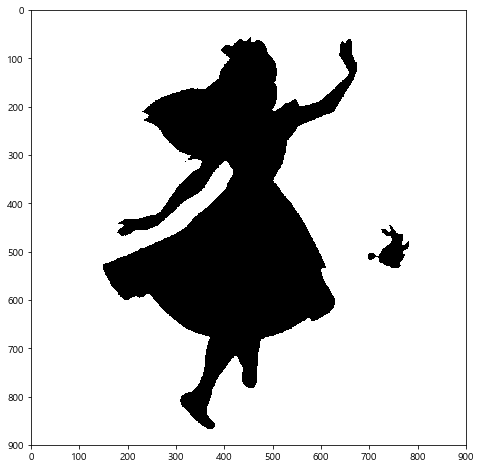

In [32]:
# 엘리스 그림 모양
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap = plt.cm.gray)
plt.show()

In [36]:
sw = set(STOPWORDS)
sw.add('said')
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords = sw)

In [38]:
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

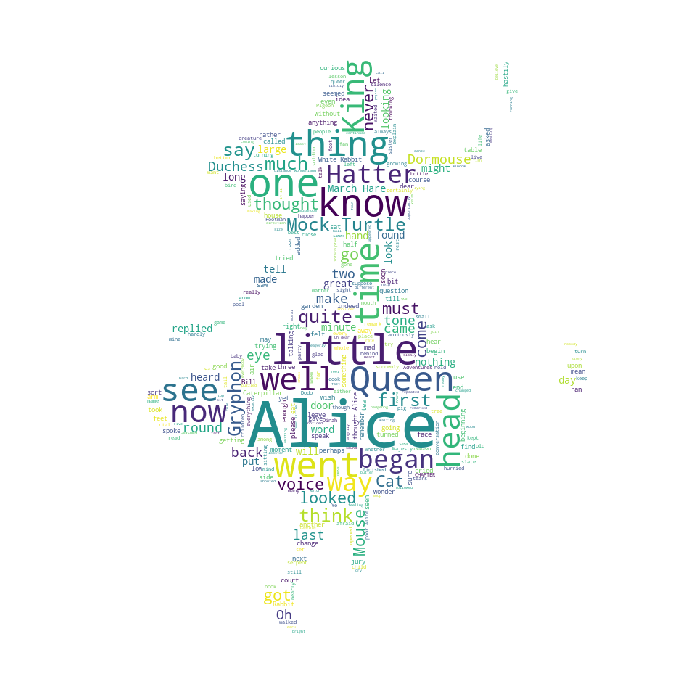

In [42]:
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

* 점수(별점), 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용
* 감정분석(VADER) - NLTK
* good + 0.1 , awful - 0.1, perfect + 0.2
* 문장에서 저런 단어가 추출되면 나올 떄마다 점수를 더하고 빼서 점수 양수면 긍정, 음수면 부정 평가 해보자

In [54]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\i\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [106]:
data = []
sum_review = '' #워드클라우드 사용할 때 모든 리뷰 텍스트를 합친 문자열
for review in review_list :
    score = review.find('span').get_text().replace('\n','')
    title = review.find('a').get_text().replace('\n','')
    writer = review.find('span', {'class' : 'display-name-link'}).get_text()
    date = review.find('span', {'class' : 'review-date'}).get_text()
    content = review.find('div', {'class' : 'text'}).get_text()
    
    sum_review = sum_review + content
    
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
    # polarity_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산해주고 종합 점수를 반환
    for sent in lines_list :
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    sum1 = str(sum/len(lines_list))
    
    data.append([score, title, writer, date, content, sum1])
    

{'neg': 0.231, 'neu': 0.513, 'pos': 0.256, 'compound': 0.1779}
{'neg': 0.369, 'neu': 0.511, 'pos': 0.119, 'compound': -0.6597}
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.2846}
{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.4926}
{'neg': 0.102, 'neu': 0.423, 'pos': 0.475, 'compound': 0.8625}
{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.2023}
{'neg': 0.117, 'neu': 0.38, 'pos': 0.504, 'compound': 0.9358}
{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9402}
{'neg': 0.09, 'neu': 0.667, 'pos': 0.243, 'compound': 0.6776}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.147, 'neu': 0.714, 'pos': 0.139, 'compound': -0.0516}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.7975}
{'neg': 0.078, 'neu': 0.678, 'pos': 0.244, 'compound': 0.6576}
{'neg': 0.092, 'neu': 0.808, 'pos': 0.101, 'compound': 0.048}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6808}
{'neg': 0.0, 'neu': 1.0, 

In [84]:
data

[['9/10',
  ' Great',
  'MR_Heraclius',
  '23 February 2020',
  'This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.',
  '-0.06573333333333331'],
 ['10/10',
  ' Way better than endgame',
  'michaelhowell12',
  '2 September 2019',
  'This film is way better than endgame!\nThe actions better\nThe writings better\nThe dialogues better\nThe cgi is better\nMore shocks and more emotional.\nWatching both in the cinema , the reactions to this in cinema was unbelievable compared to endgame. Dont get me wrong endgame is good but to say its the best marvel film is jus marvel fan boys being stupid.\nI just dont see how people are saying endgame is the best marvel film when theres clearly other marvel films better than it!\nBut trust me this is the film that changed the mcu , lol m

In [86]:
with open('./data/service_imdb_wordcloud.csv', 'w', encoding = 'UTF-8') as file :
    file.write('score, title, writer, date, content, sum \n')
    
    # data를 반복해서 저장
    for idx in data :
        file.write("{},{},{},{},{},{}\n".format(idx[0],idx[1],idx[2],idx[3],idx[4],idx[5]))   #파싱문제로 DF형식으로 만들어야함

In [1]:
import pandas as pd
df = pd.read_csv('./data/service_imdb_wordcloud.csv', sep=',', header = None, encoding='utf-8', error_bad_lines=False)
df

b'Skipping line 2: expected 6 fields, saw 9\nSkipping line 15: expected 6 fields, saw 11\nSkipping line 16: expected 6 fields, saw 10\nSkipping line 17: expected 6 fields, saw 73\nSkipping line 18: expected 6 fields, saw 10\nSkipping line 19: expected 6 fields, saw 18\nSkipping line 20: expected 6 fields, saw 7\nSkipping line 22: expected 6 fields, saw 7\nSkipping line 30: expected 6 fields, saw 10\nSkipping line 31: expected 6 fields, saw 21\nSkipping line 33: expected 6 fields, saw 18\nSkipping line 34: expected 6 fields, saw 7\nSkipping line 36: expected 6 fields, saw 9\nSkipping line 42: expected 6 fields, saw 13\nSkipping line 46: expected 6 fields, saw 17\nSkipping line 53: expected 6 fields, saw 7\nSkipping line 54: expected 6 fields, saw 15\n'


,0,1,2,3,4,5
0,score,title,writer,date,content,sum
1,10/10,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!,NaN
2,The actions better,NaN,NaN,NaN,NaN,NaN
3,The writings better,NaN,NaN,NaN,NaN,NaN
4,The dialogues better,NaN,NaN,NaN,NaN,NaN
5,The cgi is better,NaN,NaN,NaN,NaN,NaN
6,More shocks and more emotional.,NaN,NaN,NaN,NaN,NaN
7,Watching both in the cinema,the reactions to this in cinema was unbelieva...,NaN,NaN,NaN,NaN
8,I just dont see how people are saying endgame ...,NaN,NaN,NaN,NaN,NaN
9,But trust me this is the film that changed the...,lol maybe it because i wanted them to lose be...,0.5872857142857143,NaN,NaN,NaN


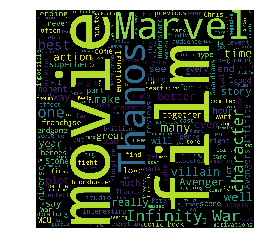

In [102]:
wordcloud = WordCloud(
    width=4000,
    height=4000,
    stopwords=set(STOPWORDS)
    
            ).generate(sum_review)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()